# Homework 1 (Linear Regression)

# COSC 3337 -  Dr. Rizk
## _Minh Nguyen - 2069407_

### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and contains the following attributes about red wine:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dixoide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol (%)
- quality

We adjusted the dependent variable, 'quality', to make it a little more continuous.

### __Problem Statement__

Let's say we are part of a data science team that is contracted out as consultants for different companies. In this scenario, we have been assigned a contract with a red wine company which makes a special Cougar Red Blend wine. They have a number of different varieties, each given different quality scores. The wine company has collected different characteristics about their different wines over the years, but they want to know how these variables impact a wine's quality rating. They have no idea what tools to use to do this!

In general, the company would like to know:

- Which variables are significant in predicting the quality of a Cougar Red Blend
- How well those variables describe the quality of the wine

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW1.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

In [2]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

### __Part 2. Reading and Understanding the Data__ ###

Import the data using Pandas into a dataframe named `wine_df`. Then, display the first 5 rows

In [3]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
wine_data = pd.read_csv('wine_quality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


Print some basic statistics of the data

In [4]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
wine_data.shape

(1599, 12)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


We can see we don't have any missing values here.

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function

<AxesSubplot:>

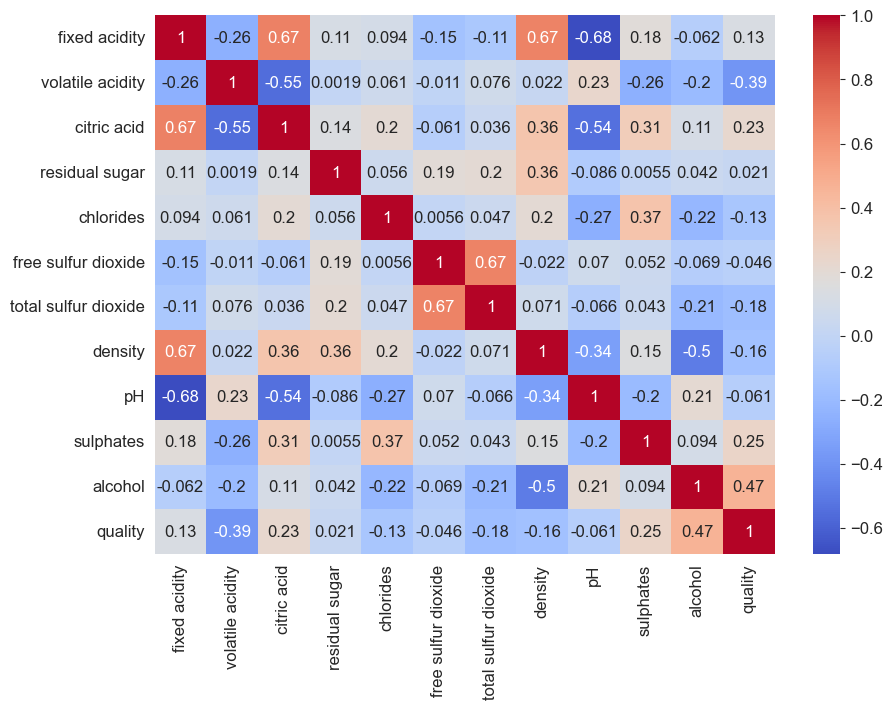

In [7]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# sns.heatmap(wine_data.corr(), annot=True, cmap='viridis')
# sns.heatmap(wine_data.corr(), annot=True, cmap='inferno')
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')

__Q1__: Does this reveal anything interesting for us? If so, what?

(After each question is a cell that we changed from 'Code' to 'Markdown'. Instead of reading Python code, Jupyter will read these as Markdown blocks, which is a way to code/format text. Here is a [Markdown Basic Guide](https://www.markdownguide.org/basic-syntax/))

- Yes, we can see a pretty strong `negative` correlation between the `fixed acidity` and the `pH`. As the pH increases, the fixed acidity decreases. However, it's completely opposite with citric acid since there's a pretty strong `positive` correlation between the `fixed acidity` and the `citric acid`. As the fixed acidity increases, the citric acid increases as well. From the heatmap, we can also see a `positive` correlation between the `wine quality` and the `citric acid`. As the `citric acid` increases, the wine `quality` increases. As the results, we might also say that as the `pH` decreases, the `quality` increases. However, the correlation between the `pH` and the `quality` is not strong enough to conclude that.

Using Seaborn regplots, plot *__each__* feature in the same style as the plot below. (Use a for loop. There should be 11 plots like the one below. Try experimenting with different colors, too!)

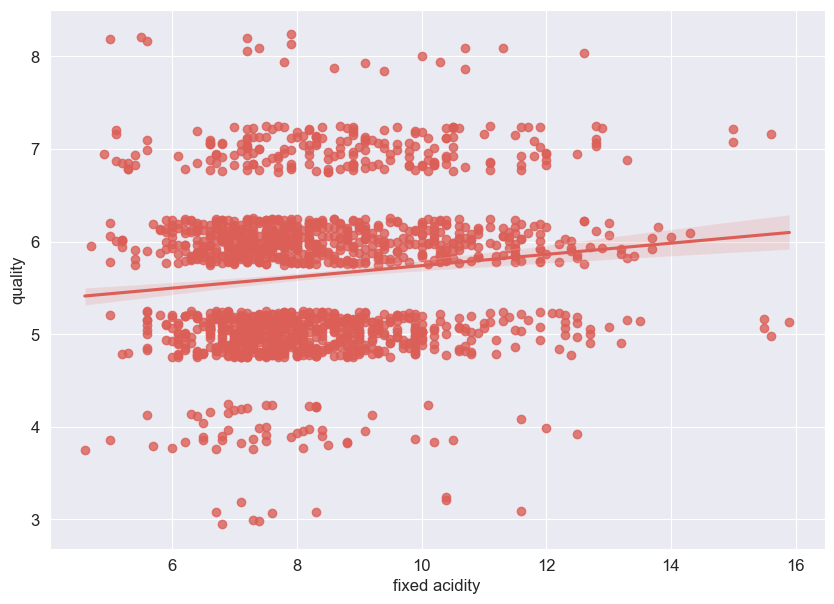

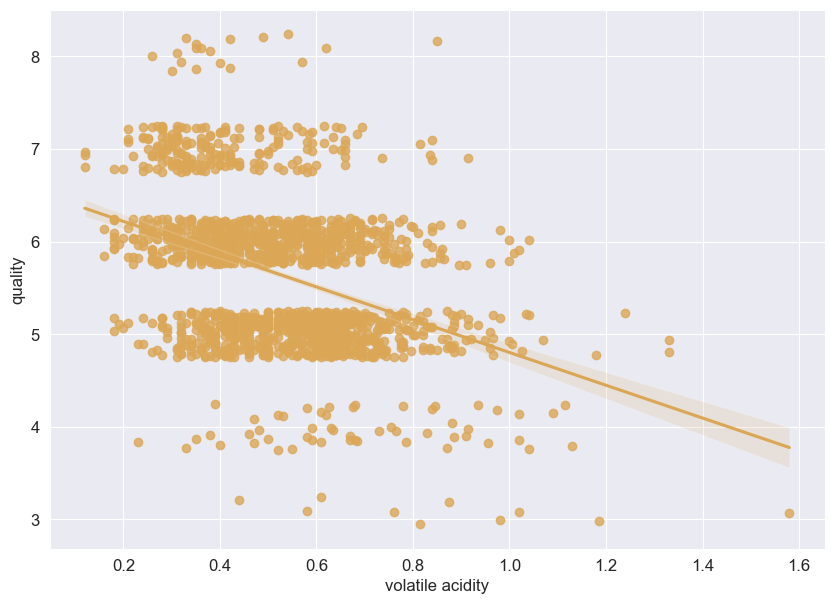

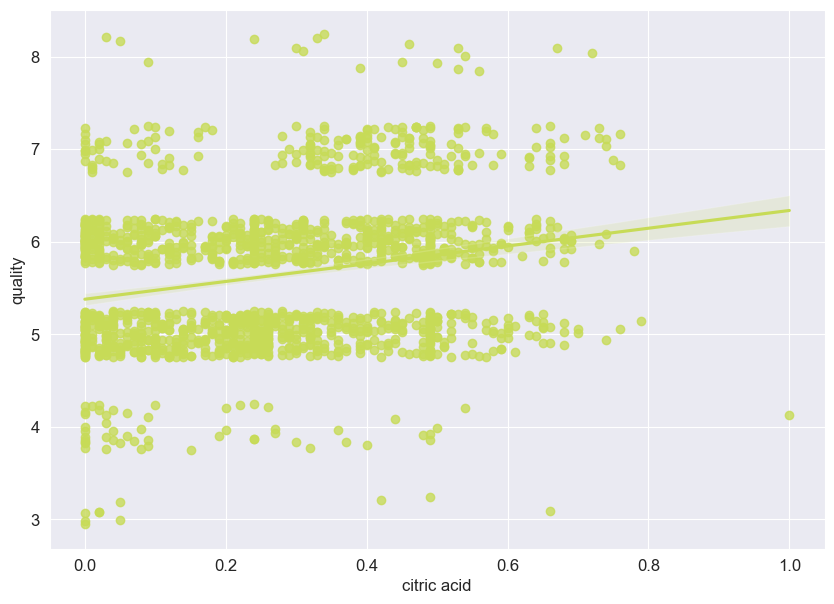

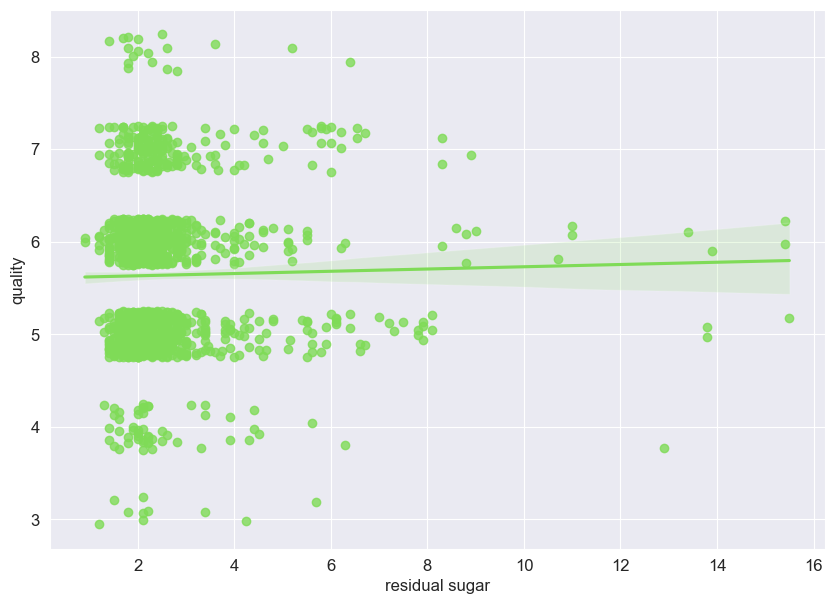

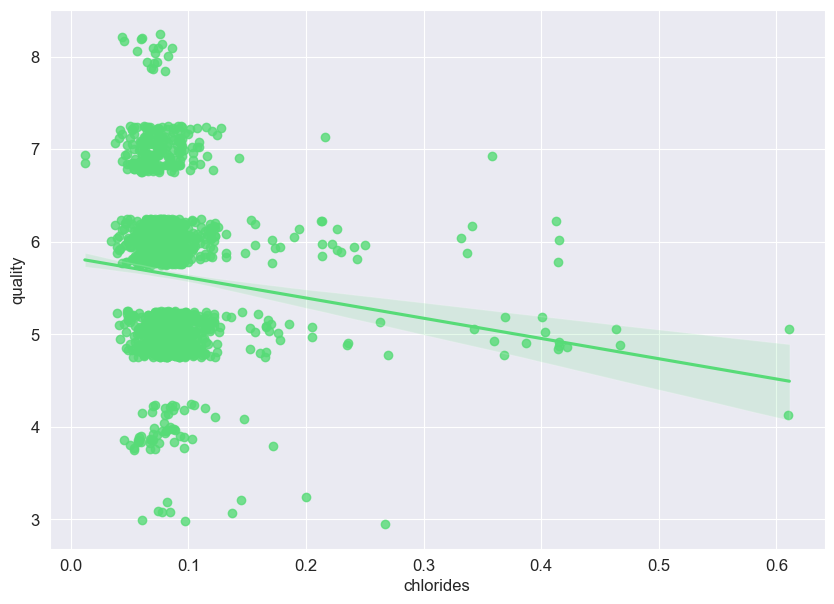

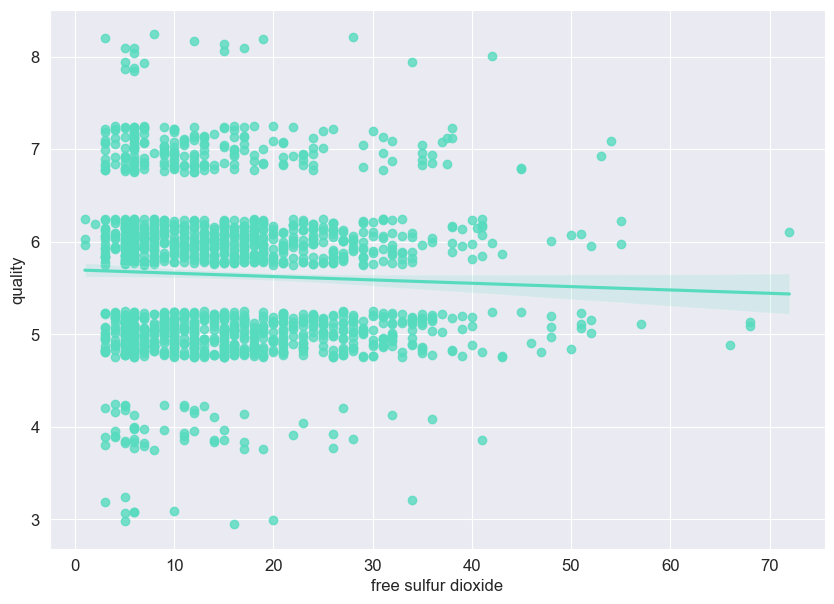

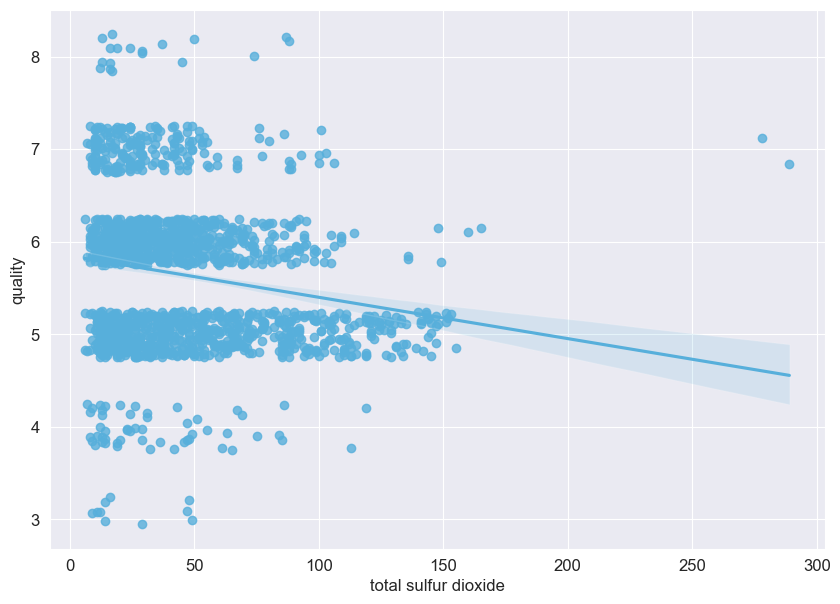

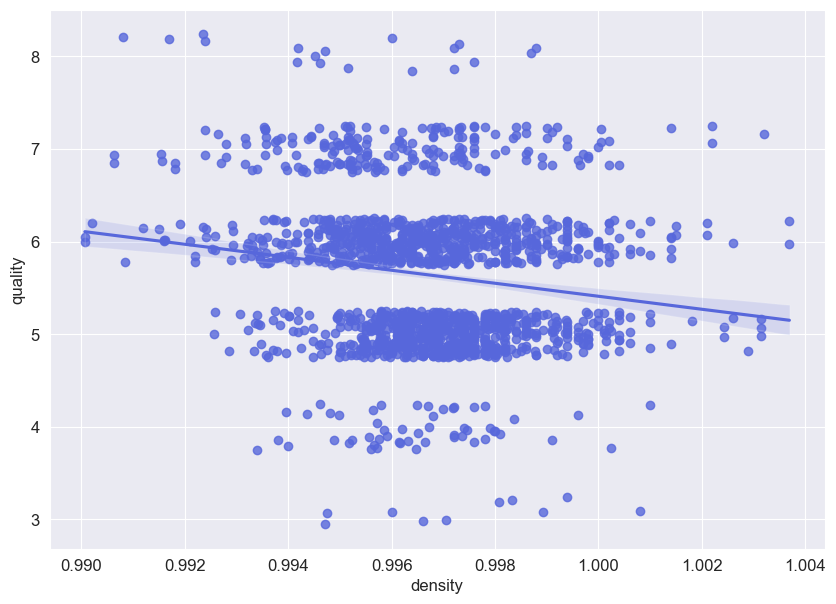

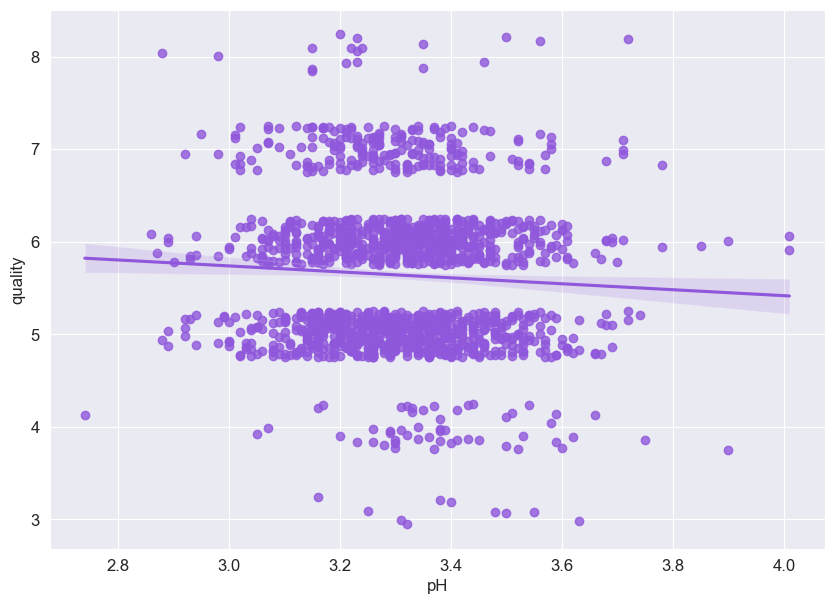

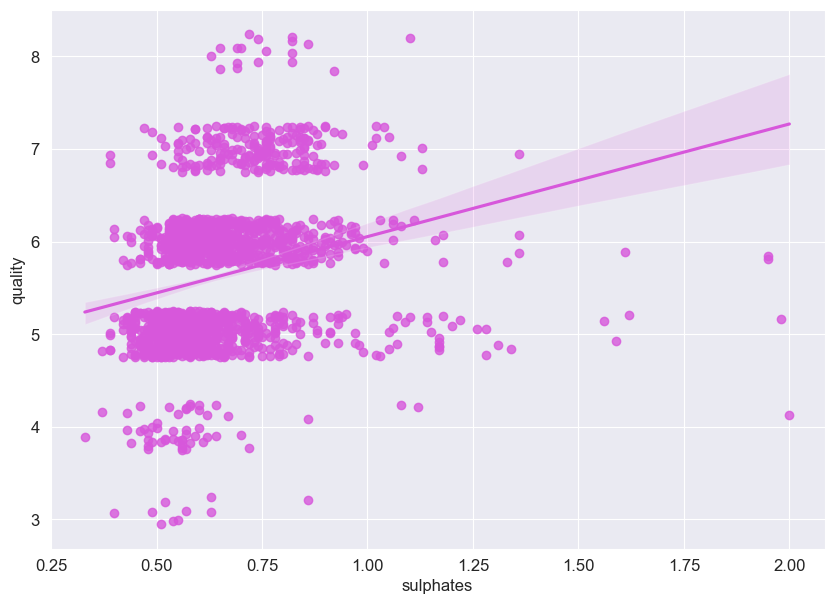

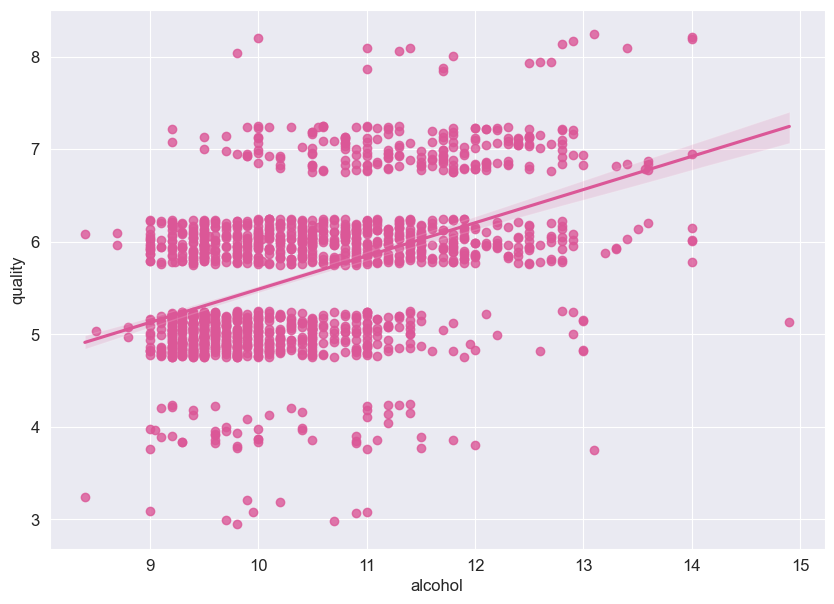

In [30]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# create a set of colors using color_palette function from Seaborn
palette = sns.color_palette("hls", 11)

columns_set = wine_data.columns

# exclude quality column (last column)
for i in range(len(columns_set) - 1):
    sns.regplot(x=columns_set[i], y=columns_set[len(columns_set)-1], data=wine_data, color=palette[i])
    plt.show()

__Q2__: Is there anything that sticks out? What features seem to have the strongest relationship with quality?


- There're a few features that have strong relationships with `quality`. However, we can say `alcohol` (__*positive relationship*__) and `volatile acidity` (__*negative relationship*__) have the strongest relationship with `quality`. The higher `alcohol` level, the higher `quality` of wine.

__Q3__: How do these findings compare with your conclusions gathered from the correlation matrix?

- They're pretty much similar. However, with these regplot, I can have a better idea of how each feature related to the quality of wine. For example, it makes more sense when I see the relationship between `alcohol` and `quality` (since according to the heatmap, the correlation between `alcohol` and `quality` is just __0.49__). I believe we should try a few different ways to see the relationship between attributes of data.

### __Part 3. Data Cleaning and Preparation for Analysis__

Use Pandas to find if there are any missing values in the data set

In [33]:
### PUT YOUR CODE HERE
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

__Q4:__ If there were missing values, how do you think you would deal with them in this data set?





- If so, I think we should remove the missing values if they don't really affect the target value (or have less impaction) or if the number of missing values is small and safe enough to be removed. Otherwise, we would replace the missing ones with mean data of the corresponding column.

__Q5:__ Are there any categorical features in the data set? If so, which ones are they?

(HINT: Remember, Categorical variables are those whose numbers are representations of a certain category. For example, if there is a "Gender" feature, we might change all "male" values to 1 and all "female" values to 2. In this sense, the numbers don't have any real meaning, but are a way we can turn non-numerical attributes into numbers that we can then use in our models.)

Using Pandas replace, encode any categorical variables accordingly. 

In [10]:
### PUT YOUR CODE HERE

In order to run the models, we will create a Pandas dataframe `X`, containing the independent variables, and an array of the dependent variable, `y`. But before we do that, we should scale our data. 

However, what's the best way to scale?

First, let's create an `X_unscaled` Pandas dataframe from our `wine_df` dataframe. Then, create a `y_unscaled` Pandas series of the dependent variable, 'quality'.

In [11]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT

Next, use Sci-Kit Learn's MinMaxScaler and StandardScaler (imported above) to create new sets of pandas dataframes from `X_unscaled`:
- `X_mm` (Using MinMaxScaler)
- `X_ss` (Using StandardScaler)

** The Scaler functions output 2D arrays, so you will need to turn them back into Pandas Dataframes, which can be passed directly to the Linear Regression function.

__Q6__: What statistical assumption does the Standard Scaler make about the data? Why might this be important?



__Q7__: What do you think the effect will be on using Linear Regression on differently scaled (or unscaled) data?

In [12]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT

In [13]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT

Our final task before performing Linear Regression is to separate our data into training and testing sets. We have 3 different X dataframes, each with the same data but scaled differently:
- `X_unscaled`
- `X_ss`
- `X_mm`

Use Sci-Kit Learn's train_test_split function to create a training and testing set for each of the 3 data sets (Use `y_unscaled` for each of the data sets):
- `train_X_unscaled`, `train_y_unscaled`, `test_X_unscaled`, `test_y_unscaled`
- `train_X_ss`, `train_y_ss`, `test_X_ss`, `test_y_ss`
- `train_X_mm`, `train_y_mm`, `test_X_mm`, `test_y_mm`

Use a train/test split of 80/20

In [14]:
### PUT YOUR CODE HERE

### __Part 4: Model Creation and Evaluation__

Now, we have 3 sets of data sets, and we will use each of them to do Linear Regression modelling. For *__each__* of the 3 data sets, do the following (the output of using unscaled data is below):

1. Create a Sci-kit Learn Linear Regression model, and train (fit) it on the training data.
2. Use this model to predict quality values for the corresponding test_X values, and save these test predictions as `predictions`.
3. Use `predictions` and `test_y` values to calculate `residuals`
4. Create a Seaborn scatter plot of the true quality vs. the predicted quality of the test set.
5. Create a Seaborn histogram of the residuals.
6. Print the $R^{2}$ value using the test values.

In [15]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT FOR UNSCALED DATA

In [16]:
### PUT YOUR CODE HERE FOR MM SCALED DATA

In [17]:
### PUT YOUR CODE HERE FOR SS SCALED DATA

Finally, create a dataframe with all of the coefficients from each of the 3 models and compare.

In [18]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT

__Q8__: As is often the case when working on real-world issues, the models may not necessarily fit perfectly. In these models, the $R^2$ values are relatively small. What does the $R^2$ value represent for our models?






__Q9__: In your estimation, which model performed the best, and why?

__Q10__: We saw that the use of differing standardizing techniques produced different results, with different coefficients and different $R^2$ values. Why do you think this is?


__Report__


The most important part of any data science project is interpretting and communicating the results to the appropriate stakeholder, whether that be a boss, client, or another team member. Given all of the analysis you've done so far, write a short report (2 - 3 paragraphs) summarizing the analysis you did, the results, and the conclusions you came to, supporting your conclusions with your analysis. Feel free to do any more analysis you wish or to modify code you've already used. Curiosity is often rewarded!